In [ ]:
# Baisc dataframe and array manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Data preprocessing
from sklearn.model_selection import train_test_split

# Model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix

# Multinomial logistic regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Gridsearch
from sklearn.model_selection import GridSearchCV

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# To deal with unnecesary warning Warnings
import warnings

## Reading data

In [ ]:
# read by default 1st sheet of an excel file
rock_category_number = list(pd.read_excel('/content/aggregateRockData-1.xlsx',
                                     header = None)[1])

# reading the tab separated file only from colum 4 onwards
data_attributes = pd.read_csv('/content/norm540.txt',
                              sep = '\t',
                              header = None).loc[:,3:]

print(len(rock_category_number))
print(data_attributes.shape)

540
(540, 19)


In [ ]:
data = data_attributes.copy()
data['rock_category_number'] = rock_category_number

## Renaming data columns

In [ ]:
name_replacement = dict(zip(list(data.columns), [x for x in range(19)]+['rock_category_number']))
data = data.rename(columns = name_replacement)

## Basic statistics

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0                     540 non-null    float64
 1   1                     540 non-null    float64
 2   2                     540 non-null    float64
 3   3                     540 non-null    float64
 4   4                     540 non-null    float64
 5   5                     540 non-null    float64
 6   6                     540 non-null    float64
 7   7                     540 non-null    float64
 8   8                     540 non-null    float64
 9   9                     540 non-null    float64
 10  10                    540 non-null    float64
 11  11                    540 non-null    float64
 12  12                    540 non-null    float64
 13  13                    540 non-null    float64
 14  14                    540 non-null    float64
 15  15                    5

In [ ]:
data['rock_category_number'].value_counts()

1    180
2    180
3    180
Name: rock_category_number, dtype: int64

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,rock_category_number
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,540.000000
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07,2.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,0.817254
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,2.000000
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01,3.000000
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00,3.000000



1.   The data seems to be standardized with means close to zero (0) and variance close to one (1)
2.   There seems to be outliers by looking at max values, will need visuals to confirm



## Data visualization

### Histograms

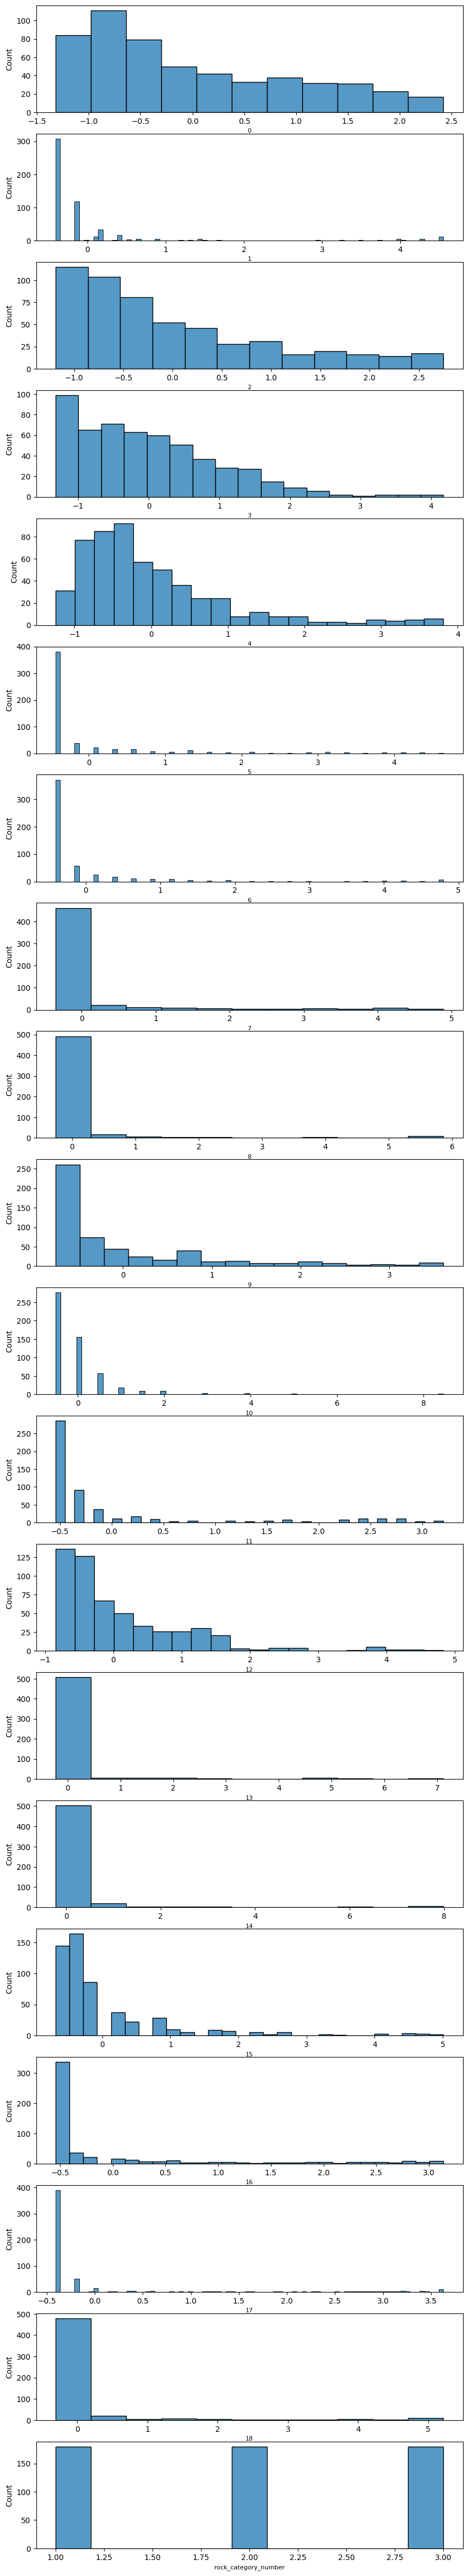

In [ ]:
# Code for plotting historgrams for the numerical features
fig, ax = plt.subplots(len(data.columns), figsize = (10,60))

for i, feature in enumerate(data.columns):
  sns.histplot(data[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

### Boxplots

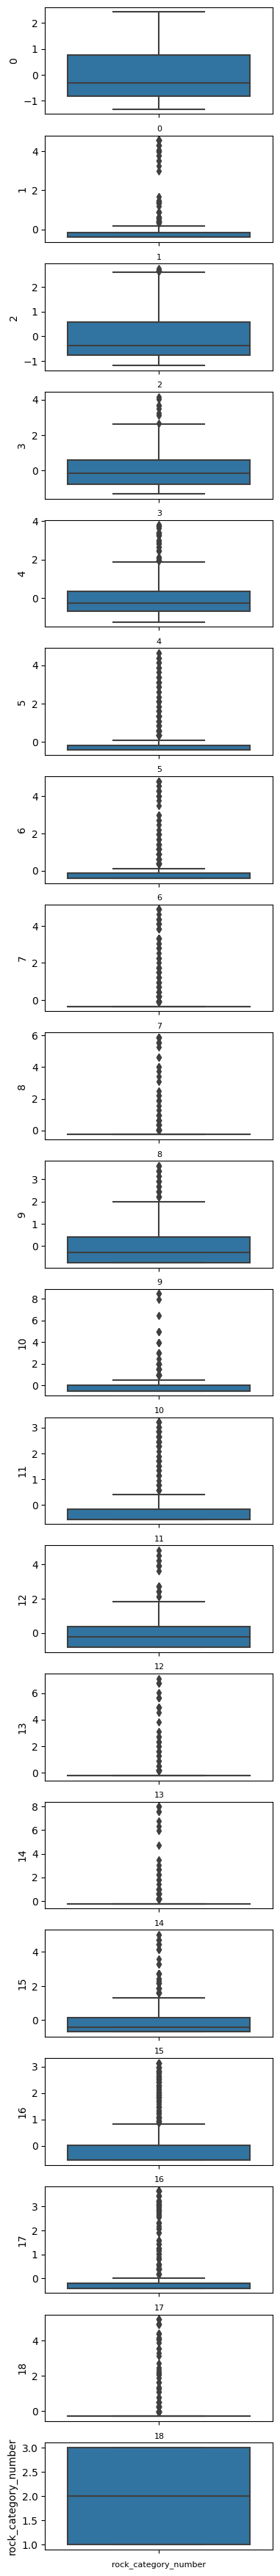

In [ ]:
# Code for plotting boxplots for all the numerical features in our data
fig, ax = plt.subplots(len(data.columns), figsize = (4,45))

for i, feature in enumerate(data.columns):
  sns.boxplot(y= data[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

### Boxplot and violin plot combo

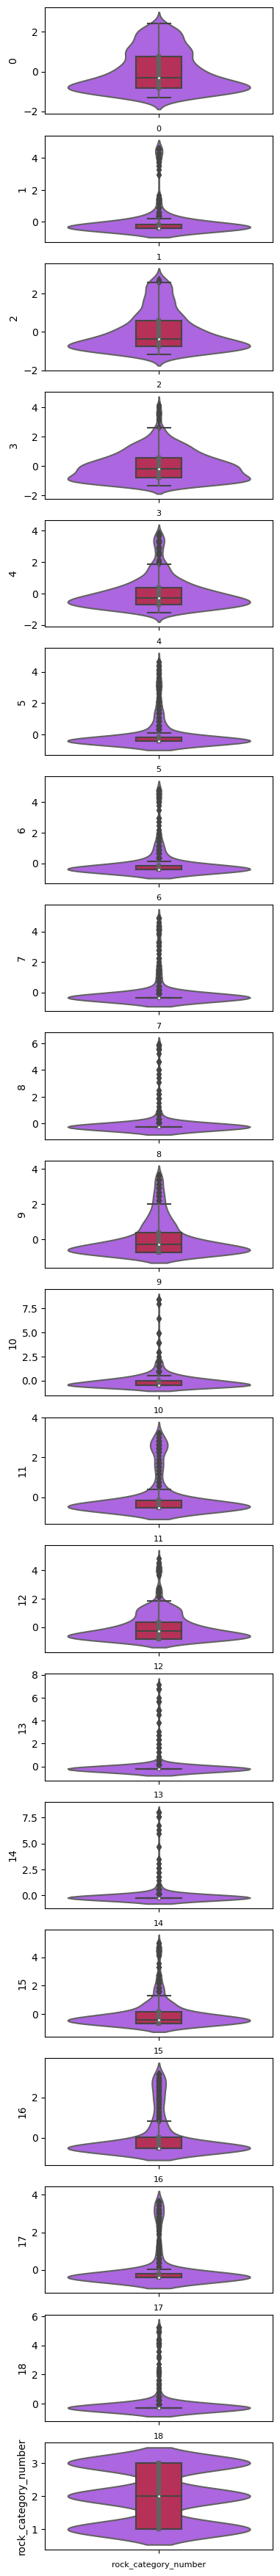

In [ ]:
# code for plotting violin +  boxplot for all numerical features in our data
fig, ax = plt.subplots(len(data.columns), figsize = (4,45))

for i, feature in enumerate(data.columns):
  sns.boxplot(y= data[feature], ax=ax[i], boxprops={'zorder': 2}, width=0.2, palette='rocket')
  sns.violinplot(y= data[feature], ax=ax[i], color = "#af52f4")
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

## Note on outliers
Althought there are several outliers in this dataset, removing them reduced the overall accuracy of each model. Therefore we have decided to keep them, and the presented work is our final attempt without outlier removal

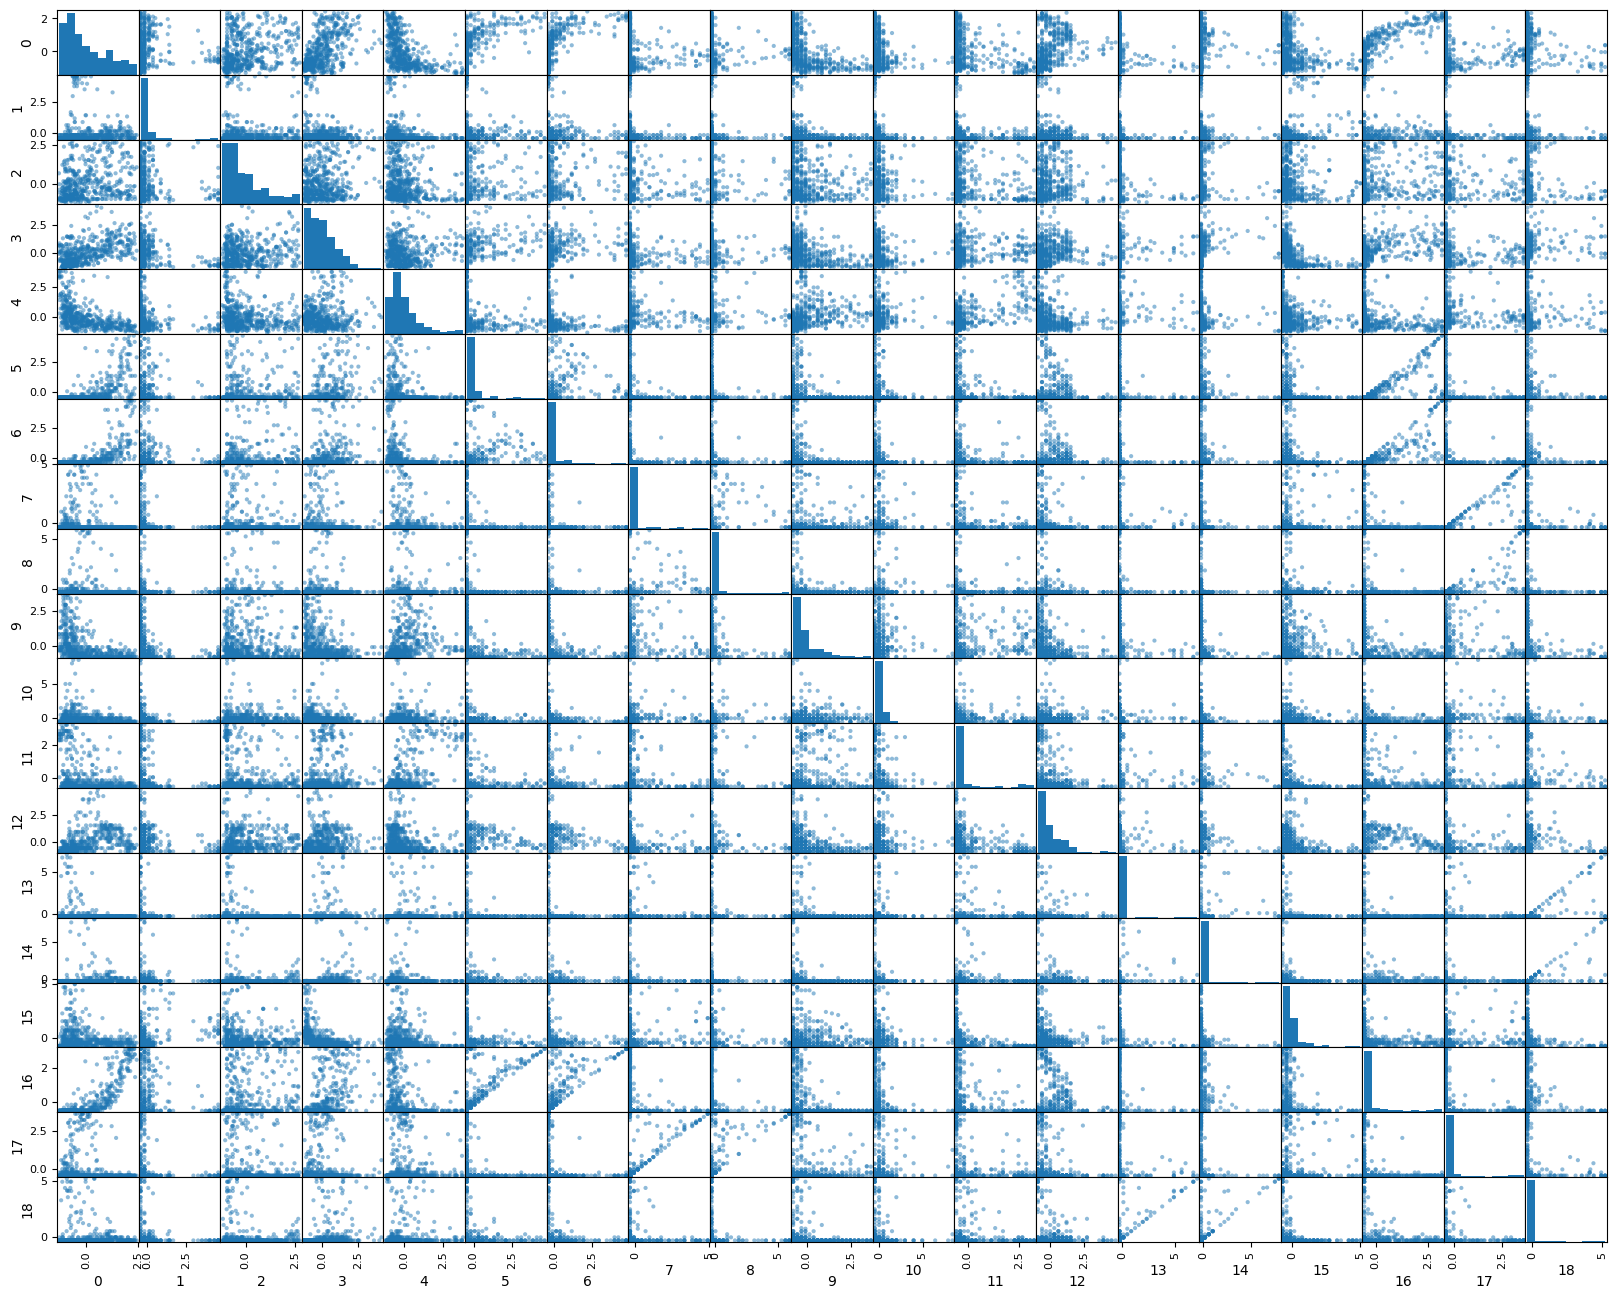

In [ ]:
scatter_matrix(data.loc[:,0:18], figsize=(20, 16))
plt.show()

In [ ]:
data.loc[:,0:18].corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.017601,0.255830,0.534070,-0.505542,0.645724,0.653319,-0.117642,-0.026782,-0.490498,-0.189307,-0.310966,0.373241,-0.163897,0.046817,-0.226060,0.819815,-0.108380,-0.086319
1,0.017601,1.000000,-0.026329,-0.199425,-0.248047,-0.026176,-0.026623,-0.112504,-0.086442,-0.210501,-0.155518,-0.154314,-0.098999,-0.082330,-0.044729,0.283791,-0.035854,-0.132162,-0.087471
2,0.255830,-0.026329,1.000000,0.126113,-0.189701,0.064291,0.186064,-0.061815,0.006080,-0.050614,-0.033938,-0.131127,0.089565,-0.168250,0.011505,-0.072024,0.169734,-0.042696,-0.109629
3,0.534070,-0.199425,0.126113,1.000000,0.055266,0.450381,0.321181,-0.081682,0.006070,-0.334001,-0.099182,0.180904,0.141837,0.128090,0.237183,-0.442259,0.498259,-0.055575,0.243675
4,-0.505542,-0.248047,-0.189701,0.055266,1.000000,-0.210173,-0.260734,-0.019918,0.058211,0.275226,0.058838,0.641196,-0.240125,0.075173,-0.088640,-0.196296,-0.293316,0.018864,-0.002322
5,0.645724,-0.026176,0.064291,0.450381,-0.210173,1.000000,0.260913,-0.137379,-0.103715,-0.229081,-0.130497,-0.152724,0.055986,-0.086229,-0.027110,-0.164748,0.783714,-0.161878,-0.078127
6,0.653319,-0.026623,0.186064,0.321181,-0.260734,0.260913,1.000000,-0.125969,-0.084503,-0.236336,-0.143923,-0.136893,0.009402,-0.090216,-0.045775,-0.133824,0.794627,-0.143357,-0.093649
7,-0.117642,-0.112504,-0.061815,-0.081682,-0.019918,-0.137379,-0.125969,1.000000,0.178444,0.006392,0.055417,-0.102114,-0.140431,-0.014729,-0.071865,0.106271,-0.168211,0.805348,-0.055964
8,-0.026782,-0.086442,0.006080,0.006070,0.058211,-0.103715,-0.084503,0.178444,1.000000,-0.125805,0.043942,-0.069111,-0.116719,-0.055039,-0.057039,-0.076266,-0.120035,0.715588,-0.076533
9,-0.490498,-0.210501,-0.050614,-0.334001,0.275226,-0.229081,-0.236336,0.006392,-0.125805,1.000000,0.074632,0.179334,-0.301661,-0.095277,-0.136120,-0.051544,-0.297611,-0.062761,-0.156928


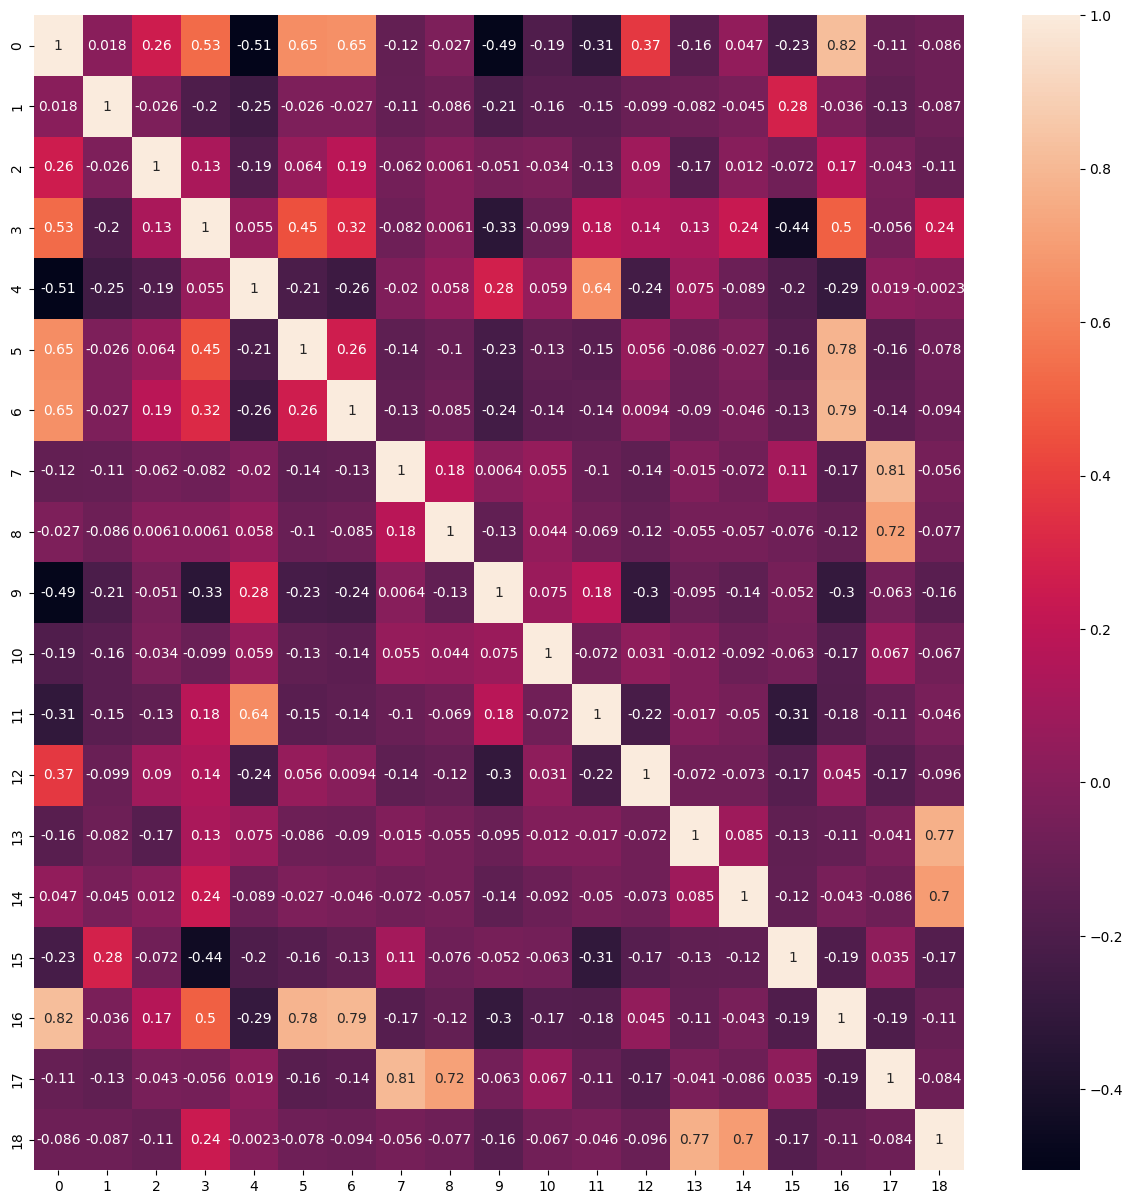

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.loc[:,0:18].corr(method = 'pearson'), cbar = True, annot = True)
plt.show()

## Splitting into training and testing set

In [ ]:
strat_train_set, validation_and_test = train_test_split(data, test_size=0.4, stratify=data['rock_category_number'], random_state=42)

In [ ]:
strat_validation_set, strat_test_set = train_test_split(validation_and_test, test_size=0.5, stratify=validation_and_test['rock_category_number'], random_state=42)

In [ ]:
print(strat_train_set.shape)
print(strat_test_set.shape)
print(strat_validation_set.shape)

(324, 20)
(108, 20)
(108, 20)


First we split the data into 60% training and 40% combined validation and testing. Then we split the 40% into two equal sets of validation and training. All of the splitting is startified based on the rock category

## Verifying the two sets are comparable

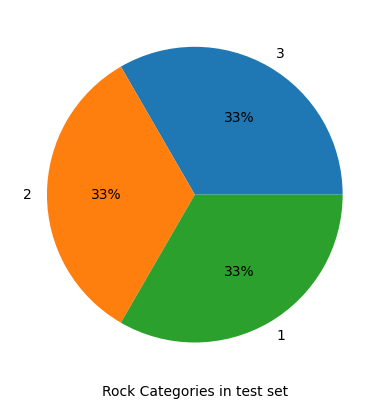

In [ ]:
fig = plt.figure(1)
temp = strat_test_set['rock_category_number'].value_counts()
plt.pie(temp, labels = temp.index, autopct='%.0f%%')
plt.xlabel('Rock Categories in test set')
plt.show()

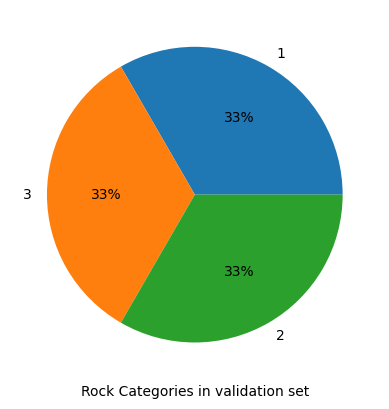

In [ ]:
fig = plt.figure(1)
temp = strat_validation_set['rock_category_number'].value_counts()
plt.pie(temp, labels = temp.index, autopct='%.0f%%')
plt.xlabel('Rock Categories in validation set')
plt.show()

## Splitting the traing and validtaion sets into X and Y

In [ ]:
X_train = strat_train_set.loc[:,0:18]
y_train = strat_train_set['rock_category_number']

In [ ]:
X_val = strat_validation_set.loc[:,0:18]
y_val = strat_validation_set['rock_category_number']

In [ ]:
X_test = strat_test_set.loc[:,0:18]
y_test = strat_test_set['rock_category_number']

## Making a generic performance reporting function

In [ ]:
def performance(X_train, X_val, X_test, y_train, y_val, y_test, model):
  y_train_pred = model.predict(X_train)
  y_val_pred = model.predict(X_val)
  y_test_pred = model.predict(X_test)

  for i, pair in enumerate([(y_train, y_train_pred),
                            (y_val, y_val_pred),
                             (y_test, y_test_pred)]):
    if i == 0:
      print("TRAINING DATA PERFORMANCE")
      print()
    elif i == 1:
      print("VALIDATION DATA PERFORMANCE")
      print()
    else:
      print("TESTING DATA PERFORMANCE")
      print()

    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(pair[0], pair[1]),
                                    colorbar=False,
                                    show_absolute=True,
                                    show_normed=True)
    plt.show()
    print(classification_report(pair[0], pair[1]))

## Multinomial Logistic Regression

#### Training a baics model

starting with a basic untuned multinomial logistic regression with all default values

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 random_state=42,
                                 max_iter=1000)
softmax_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

### Performance measures

TRAINING DATA PERFORMANCE



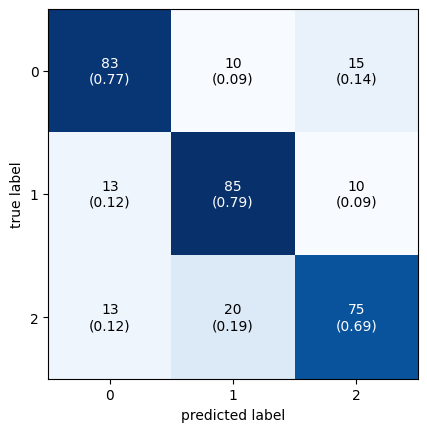

              precision    recall  f1-score   support

           1       0.76      0.77      0.76       108
           2       0.74      0.79      0.76       108
           3       0.75      0.69      0.72       108

    accuracy                           0.75       324
   macro avg       0.75      0.75      0.75       324
weighted avg       0.75      0.75      0.75       324

VALIDATION DATA PERFORMANCE



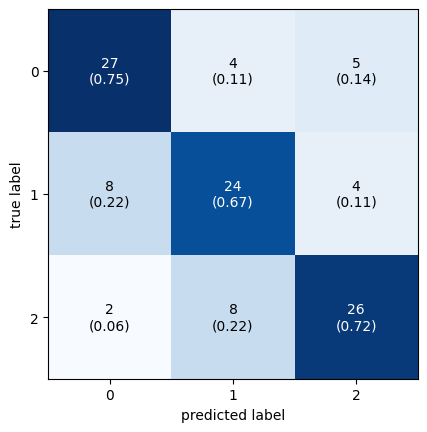

              precision    recall  f1-score   support

           1       0.73      0.75      0.74        36
           2       0.67      0.67      0.67        36
           3       0.74      0.72      0.73        36

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

TESTING DATA PERFORMANCE



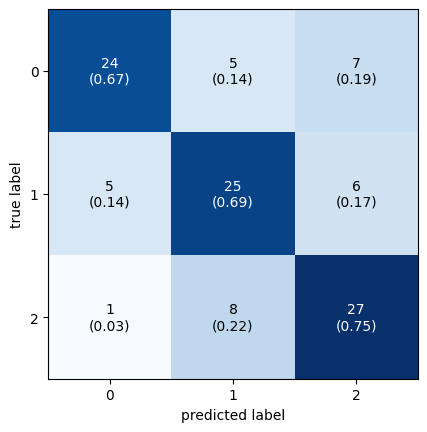

              precision    recall  f1-score   support

           1       0.80      0.67      0.73        36
           2       0.66      0.69      0.68        36
           3       0.68      0.75      0.71        36

    accuracy                           0.70       108
   macro avg       0.71      0.70      0.70       108
weighted avg       0.71      0.70      0.70       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            softmax_reg)

### Hyperparameter Tuning
This section relies on [this](https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69) medium article to develop core ideas


#### Gridsearch

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  grid_l2 = {'C' : np.logspace(-3,3,7),
             'penalty' : ['l2'],
             'max_iter': [100,1000,10000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',
                        'sag', 'saga']}

  grid_l1 = {'C' : np.logspace(-3,3,7),
             'penalty' : ['l1'],
             'max_iter': [100,1000,10000],
             'solver': ['liblinear', 'saga']}


  grid_elastic = {'C' : np.logspace(-3,3,7),
                  'penalty' : ['elasticnet'],
                  'max_iter': [100,1000,10000],
                  'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  'solver': ['saga']}

  grid_none = {'C' : np.logspace(-3,3,7),
               'penalty' : [None],
               'max_iter': [100,1000,10000],
               'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',
                          'sag', 'saga']}

  grid = [grid_l2, grid_l1, grid_elastic, grid_none]

  softmax_reg_tuned = GridSearchCV(LogisticRegression(multi_class = "multinomial",
                                                      random_state = 42),
                                   grid)
  softmax_reg_tuned.fit(X_train, y_train)

  print("Best Parameters:", softmax_reg_tuned.best_params_)
  print("Best Score:", softmax_reg_tuned.best_score_)

Best Parameters: {'C': 1000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7252403846153846




*   C is 100, suggesting moderate regularization



#### Discussion on the hyperparameters

In [ ]:
grid_search_results = pd.DataFrame(softmax_reg_tuned.cv_results_)

In [ ]:
grouped = grid_search_results.groupby('param_C')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_C
0.001       0.489331
0.010       0.559959
0.100       0.697168
1.000       0.716636
10.000      0.715068
100.000     0.718221
1000.000    0.719076
Name: mean_test_score, dtype: float64

We can see that for C >= 1 we get similar performance, hance C = 100 seems like a reasonable choice

In [ ]:
grouped = grid_search_results.groupby('param_max_iter')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_max_iter
100      0.657821
1000     0.660348
10000    0.659885
Name: mean_test_score, dtype: float64

As expected maximum number of iterations do not affect the performance very much and any iteration above 100 seems to be working similarly

In [ ]:
grouped = grid_search_results.groupby('param_penalty')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_penalty
elasticnet    0.621373
l1            0.600634
l2            0.699749
Name: mean_test_score, dtype: float64

The bad performance of l1 suggests that sparse solutions as generated by l1 (lasso) do not fit the problem we have. Meaning that all of the features have a significant impact on the classification

In [ ]:
grouped = grid_search_results.groupby('param_solver')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_solver
lbfgs              0.709675
liblinear               NaN
newton-cg          0.709602
newton-cholesky         NaN
sag                0.709235
saga               0.634275
Name: mean_test_score, dtype: float64

lbfgs, newton-cg,, and sag perform exactly the same.

#### Performance after hyperparamter tuning

TRAINING DATA PERFORMANCE



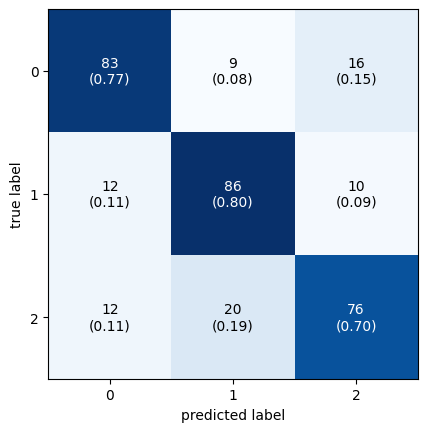

              precision    recall  f1-score   support

           1       0.78      0.77      0.77       108
           2       0.75      0.80      0.77       108
           3       0.75      0.70      0.72       108

    accuracy                           0.76       324
   macro avg       0.76      0.76      0.76       324
weighted avg       0.76      0.76      0.76       324

VALIDATION DATA PERFORMANCE



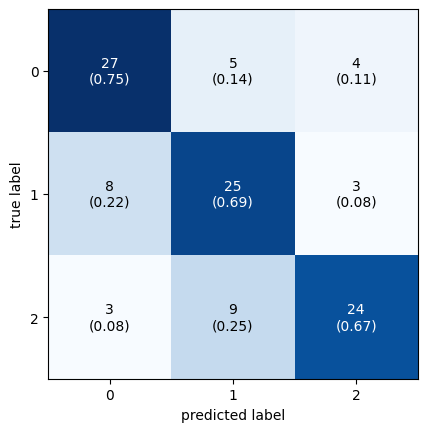

              precision    recall  f1-score   support

           1       0.71      0.75      0.73        36
           2       0.64      0.69      0.67        36
           3       0.77      0.67      0.72        36

    accuracy                           0.70       108
   macro avg       0.71      0.70      0.70       108
weighted avg       0.71      0.70      0.70       108

TESTING DATA PERFORMANCE



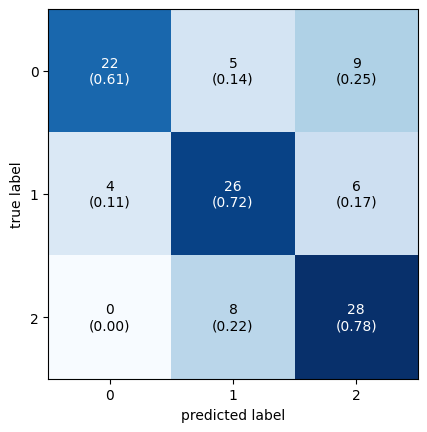

              precision    recall  f1-score   support

           1       0.85      0.61      0.71        36
           2       0.67      0.72      0.69        36
           3       0.65      0.78      0.71        36

    accuracy                           0.70       108
   macro avg       0.72      0.70      0.70       108
weighted avg       0.72      0.70      0.70       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            softmax_reg_tuned)

## Support vector machines

### Training

***Linear kernel SVC***

In [ ]:
linear_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="linear", C=1))
    ])
linear_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='linear'))])

***Polynomial kernel SVC***

In [ ]:
poly_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, C=100, gamma="auto"))
    ])
poly_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, degree=2, gamma='auto', kernel='poly'))])

### Performance measure

***Linear kernel SVC***

TRAINING DATA PERFORMANCE



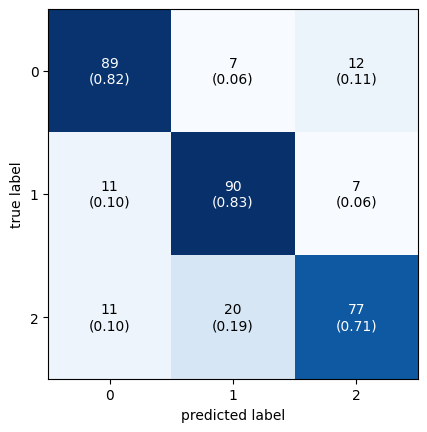

              precision    recall  f1-score   support

           1       0.80      0.82      0.81       108
           2       0.77      0.83      0.80       108
           3       0.80      0.71      0.75       108

    accuracy                           0.79       324
   macro avg       0.79      0.79      0.79       324
weighted avg       0.79      0.79      0.79       324

VALIDATION DATA PERFORMANCE



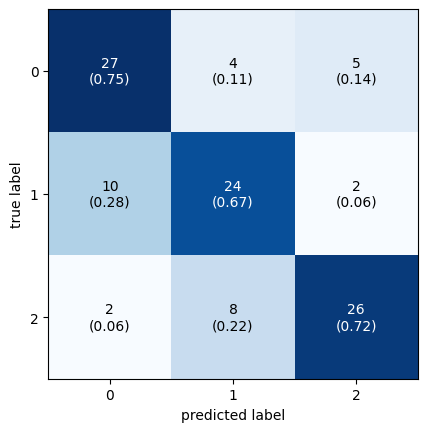

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        36
           2       0.67      0.67      0.67        36
           3       0.79      0.72      0.75        36

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108

TESTING DATA PERFORMANCE



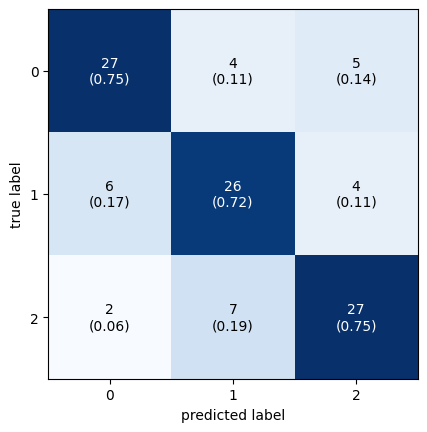

              precision    recall  f1-score   support

           1       0.77      0.75      0.76        36
           2       0.70      0.72      0.71        36
           3       0.75      0.75      0.75        36

    accuracy                           0.74       108
   macro avg       0.74      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            linear_svm_clf)

***Polynomial kernel SVC***

TRAINING DATA PERFORMANCE



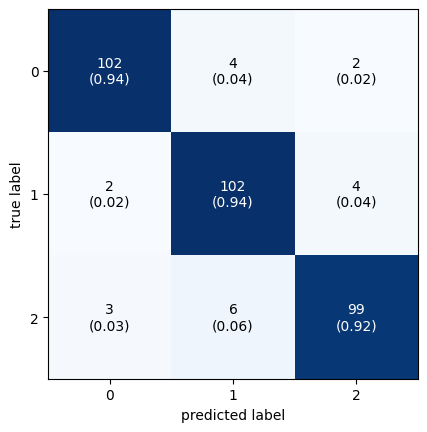

              precision    recall  f1-score   support

           1       0.95      0.94      0.95       108
           2       0.91      0.94      0.93       108
           3       0.94      0.92      0.93       108

    accuracy                           0.94       324
   macro avg       0.94      0.94      0.94       324
weighted avg       0.94      0.94      0.94       324

VALIDATION DATA PERFORMANCE



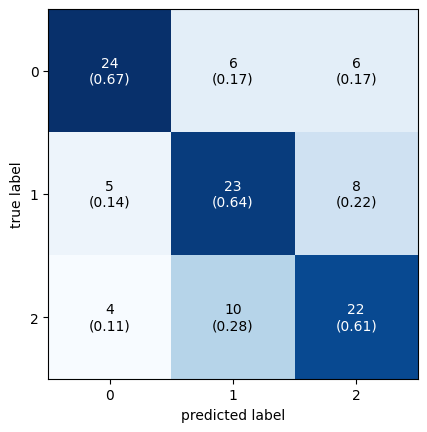

              precision    recall  f1-score   support

           1       0.73      0.67      0.70        36
           2       0.59      0.64      0.61        36
           3       0.61      0.61      0.61        36

    accuracy                           0.64       108
   macro avg       0.64      0.64      0.64       108
weighted avg       0.64      0.64      0.64       108

TESTING DATA PERFORMANCE



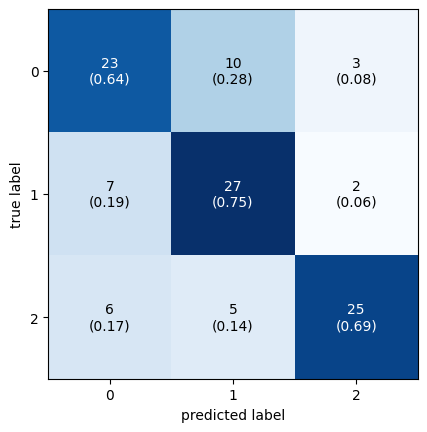

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        36
           2       0.64      0.75      0.69        36
           3       0.83      0.69      0.76        36

    accuracy                           0.69       108
   macro avg       0.71      0.69      0.70       108
weighted avg       0.71      0.69      0.70       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            poly_svm_clf)

*   The SVM classifier with the linear kernel seems to perform better than the one with the polynomial kernel.
*  Hyperparameter tuning, however, will have the final say and elect the best classifier.



### Hyperparameter tuning

#### Gridsearch

*   Using grid search, we can explore the best SVM classifier and the hyperparameters that ought to go along with it.


In [ ]:
c_values = [0.1, 1, 10, 100, 1000]
gamma_values = [1, 0.1, 0.01, 0.001, 0.0001,'auto']

svm_linear = {'svm_clf__C': c_values,
              'svm_clf__kernel': ['linear']}


svm_poly = {'svm_clf__C': c_values,
            'svm_clf__gamma': gamma_values,
            'svm_clf__degree': [2, 3, 5, 10],
            'svm_clf__kernel': ['poly']}

svm_others = {'svm_clf__C': c_values,
              'svm_clf__gamma': gamma_values,
              'svm_clf__kernel': ['rbf', 'sigmoid']}


clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(probability=True))
    ])

parameters = [svm_linear, svm_poly, svm_others]

SVM_tuned = GridSearchCV(clf, param_grid=parameters)
SVM_tuned.fit(X_train, y_train)

print("Best Parameters:", SVM_tuned.best_params_)
print("Best Score:", SVM_tuned.best_score_)

Best Parameters: {'svm_clf__C': 10, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
Best Score: 0.7901442307692308


> Setting `probabilty=true` allows the SVC to provide probability estimates through Platt scaling, making it compatible with the soft voting approach.

#### Performance after hyperparameter tuning

TRAINING DATA PERFORMANCE



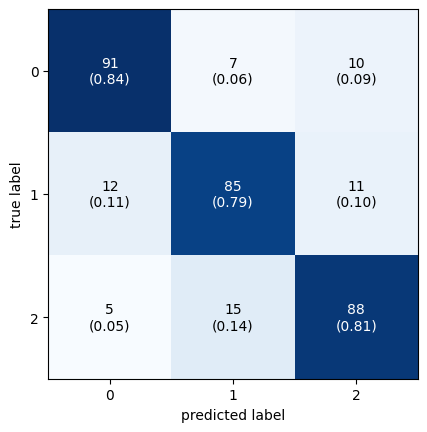

              precision    recall  f1-score   support

           1       0.84      0.84      0.84       108
           2       0.79      0.79      0.79       108
           3       0.81      0.81      0.81       108

    accuracy                           0.81       324
   macro avg       0.81      0.81      0.81       324
weighted avg       0.81      0.81      0.81       324

VALIDATION DATA PERFORMANCE



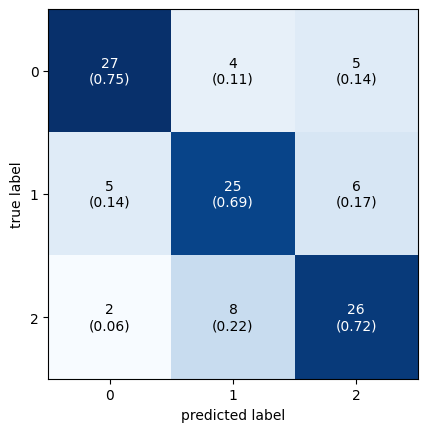

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        36
           2       0.68      0.69      0.68        36
           3       0.70      0.72      0.71        36

    accuracy                           0.72       108
   macro avg       0.72      0.72      0.72       108
weighted avg       0.72      0.72      0.72       108

TESTING DATA PERFORMANCE



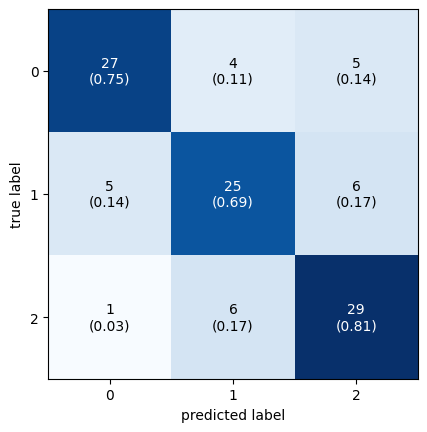

              precision    recall  f1-score   support

           1       0.82      0.75      0.78        36
           2       0.71      0.69      0.70        36
           3       0.72      0.81      0.76        36

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.75      0.75      0.75       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            SVM_tuned)

*   SVM classifier with the RBF kernel was found to be the best overall. It performs better than the classifiers with the linear kernel and polynomial kernel that were first adopted.
*   Using the RBF kernel suggests that the data is not linearly separable, and that it is better suited for a non-linear decision boundary. So, RBF can map it to a higher dimensional space.
* A mid-range C value regularizes the model just enough so that it does not overfit the training data. The exact same thing can be said about the value of gamma.

## Random Forest

### Training

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

### Performance measure

TRAINING DATA PERFORMANCE



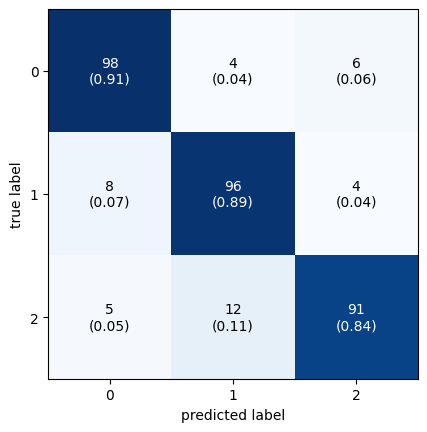

              precision    recall  f1-score   support

           1       0.88      0.91      0.89       108
           2       0.86      0.89      0.87       108
           3       0.90      0.84      0.87       108

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324

VALIDATION DATA PERFORMANCE



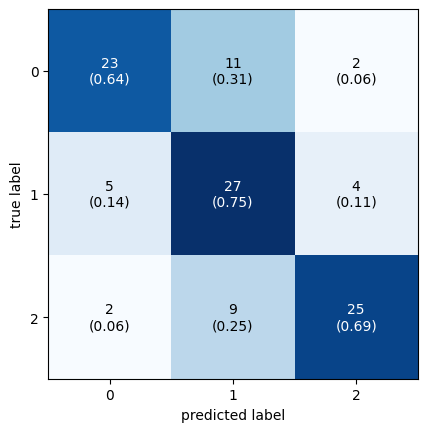

              precision    recall  f1-score   support

           1       0.77      0.64      0.70        36
           2       0.57      0.75      0.65        36
           3       0.81      0.69      0.75        36

    accuracy                           0.69       108
   macro avg       0.72      0.69      0.70       108
weighted avg       0.72      0.69      0.70       108

TESTING DATA PERFORMANCE



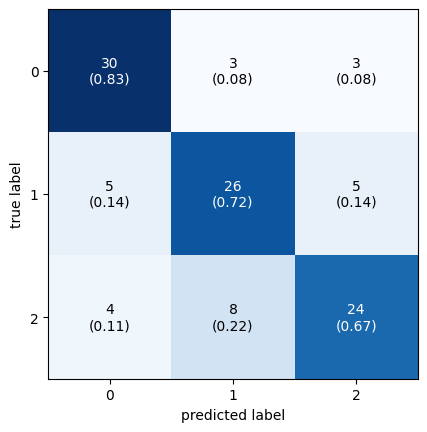

              precision    recall  f1-score   support

           1       0.77      0.83      0.80        36
           2       0.70      0.72      0.71        36
           3       0.75      0.67      0.71        36

    accuracy                           0.74       108
   macro avg       0.74      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            rnd_clf)

### Hyperparameter Tuning
This section relies on code from the second chapter of textbook


#### Gridsearch

Create a grid for the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}
rnd_clf = RandomForestClassifier()
grid_search = GridSearchCV(rnd_clf, param_grid)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.7810096153846154


#### Performance after hyperparameter tuning

TRAINING DATA PERFORMANCE



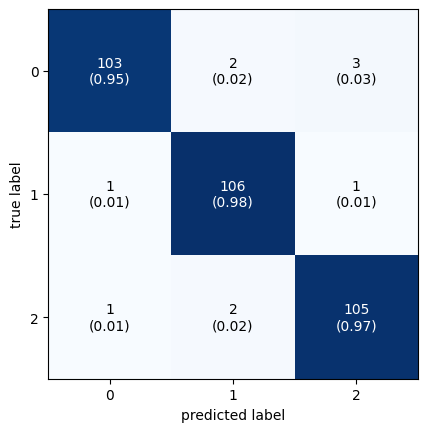

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       108
           2       0.96      0.98      0.97       108
           3       0.96      0.97      0.97       108

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324

VALIDATION DATA PERFORMANCE



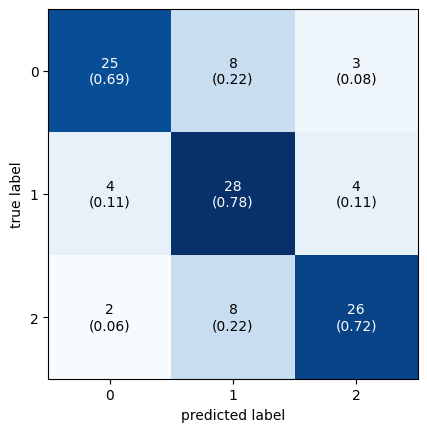

              precision    recall  f1-score   support

           1       0.81      0.69      0.75        36
           2       0.64      0.78      0.70        36
           3       0.79      0.72      0.75        36

    accuracy                           0.73       108
   macro avg       0.74      0.73      0.73       108
weighted avg       0.74      0.73      0.73       108

TESTING DATA PERFORMANCE



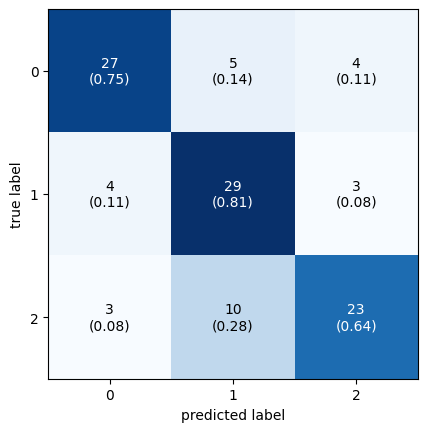

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        36
           2       0.66      0.81      0.73        36
           3       0.77      0.64      0.70        36

    accuracy                           0.73       108
   macro avg       0.74      0.73      0.73       108
weighted avg       0.74      0.73      0.73       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            grid_search)

#### Discussion on the hyperparamters

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
tuning_random_forest = cv_res[['param_max_depth',	'param_min_samples_leaf',	'param_min_samples_split',	'param_n_estimators', 'mean_test_score']]

In [ ]:
grouped = tuning_random_forest.groupby('param_max_depth')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_max_depth
2     0.645598
4     0.718316
6     0.742119
8     0.748213
10    0.748571
Name: mean_test_score, dtype: float64

So we can se that increase in depth leads to increase in score. It make sense because we do not do cross-validation, so in this case it leads to overfitting.

In [ ]:
grouped = tuning_random_forest.groupby('param_min_samples_leaf')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_min_samples_leaf
1    0.731697
2    0.725402
4    0.718474
Name: mean_test_score, dtype: float64

Minimum sample in leaf do not really affect the score on average

In [ ]:
grouped = tuning_random_forest.groupby('param_min_samples_split')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_min_samples_split
2    0.725696
5    0.725833
7    0.724044
Name: mean_test_score, dtype: float64

Minimum sample to split do affect too

In [ ]:
grouped = tuning_random_forest.groupby('param_n_estimators')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_n_estimators
50     0.719325
100    0.725085
200    0.728809
300    0.727545
Name: mean_test_score, dtype: float64

This parameter do not really affect too

So we have not affect on average but still we should find the best pair of all the parameters

In [ ]:
random_forest_best = RandomForestClassifier(max_leaf_nodes=16, max_depth = 8, min_samples_leaf = 1,
                                min_samples_split = 2, n_estimators = 50, n_jobs=-1, random_state=42)
random_forest_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=16, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [ ]:
for score, name in zip(random_forest_best.feature_importances_, X_train.columns):
  print(round(score, 2), name)

0.17 0
0.08 1
0.03 2
0.07 3
0.06 4
0.07 5
0.05 6
0.02 7
0.01 8
0.04 9
0.02 10
0.03 11
0.05 12
0.02 13
0.02 14
0.08 15
0.1 16
0.04 17
0.04 18


## Hard Voting

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  voting_clf_hard = VotingClassifier(
      estimators=[('Softmax Regression', softmax_reg_tuned),
       ('Random Forest', grid_search),
        ('SVM', SVM_tuned)],
      voting='hard')
  voting_clf_hard.fit(X_train, y_train)

TRAINING DATA PERFORMANCE



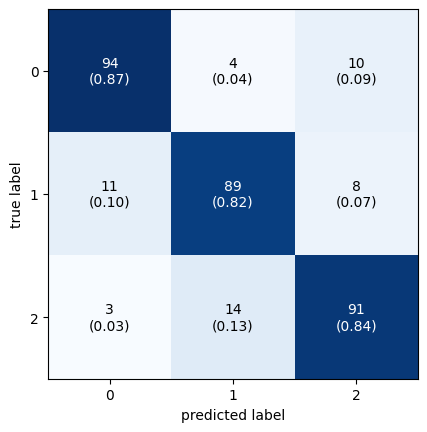

              precision    recall  f1-score   support

           1       0.87      0.87      0.87       108
           2       0.83      0.82      0.83       108
           3       0.83      0.84      0.84       108

    accuracy                           0.85       324
   macro avg       0.85      0.85      0.85       324
weighted avg       0.85      0.85      0.85       324

VALIDATION DATA PERFORMANCE



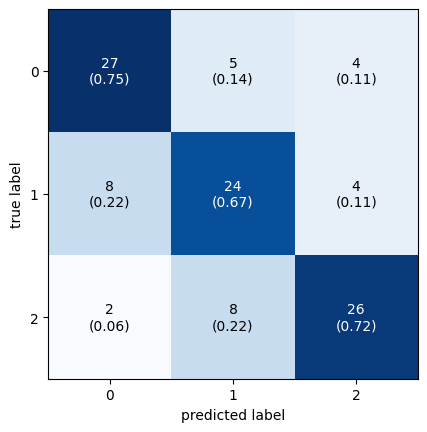

              precision    recall  f1-score   support

           1       0.73      0.75      0.74        36
           2       0.65      0.67      0.66        36
           3       0.76      0.72      0.74        36

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

TESTING DATA PERFORMANCE



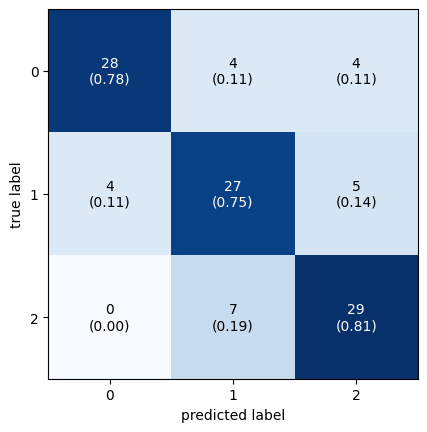

              precision    recall  f1-score   support

           1       0.88      0.78      0.82        36
           2       0.71      0.75      0.73        36
           3       0.76      0.81      0.78        36

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            voting_clf_hard)

## Soft Voting

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  voting_clf_soft = VotingClassifier(
      estimators=[('Softmax Regression', softmax_reg_tuned),
                  ('Random Forest', grid_search),
                  ('SVM', SVM_tuned)], voting='soft')
  voting_clf_soft.fit(X_train, y_train)

TRAINING DATA PERFORMANCE



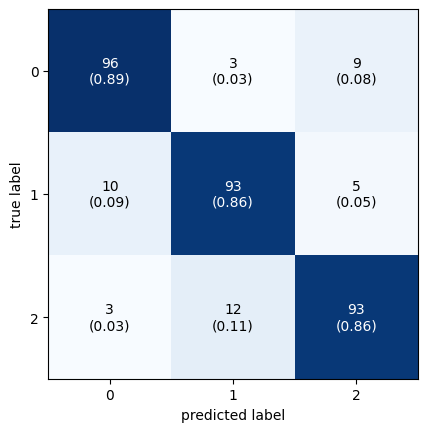

              precision    recall  f1-score   support

           1       0.88      0.89      0.88       108
           2       0.86      0.86      0.86       108
           3       0.87      0.86      0.87       108

    accuracy                           0.87       324
   macro avg       0.87      0.87      0.87       324
weighted avg       0.87      0.87      0.87       324

VALIDATION DATA PERFORMANCE



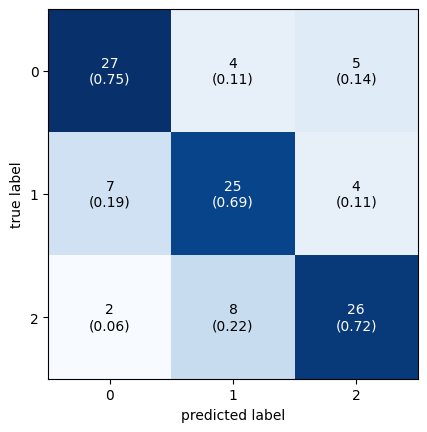

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        36
           2       0.68      0.69      0.68        36
           3       0.74      0.72      0.73        36

    accuracy                           0.72       108
   macro avg       0.72      0.72      0.72       108
weighted avg       0.72      0.72      0.72       108

TESTING DATA PERFORMANCE



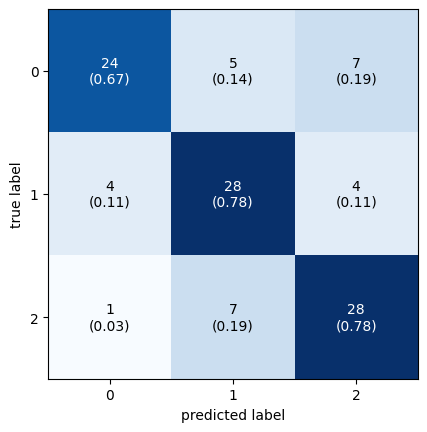

              precision    recall  f1-score   support

           1       0.83      0.67      0.74        36
           2       0.70      0.78      0.74        36
           3       0.72      0.78      0.75        36

    accuracy                           0.74       108
   macro avg       0.75      0.74      0.74       108
weighted avg       0.75      0.74      0.74       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            voting_clf_soft)

Now we will try some others tecniques to get 80% accuracy on validation set.

## Stacking and Gradient Boosting

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  meta_estimator = LogisticRegression()
  stacking_classifier = StackingClassifier(estimators=[('Softmax Regression', softmax_reg_tuned),
                  ('Random Forest', grid_search),
                  ('SVM', SVM_tuned)], final_estimator=meta_estimator)

  stacking_classifier.fit(X_train, y_train)

TRAINING DATA PERFORMANCE



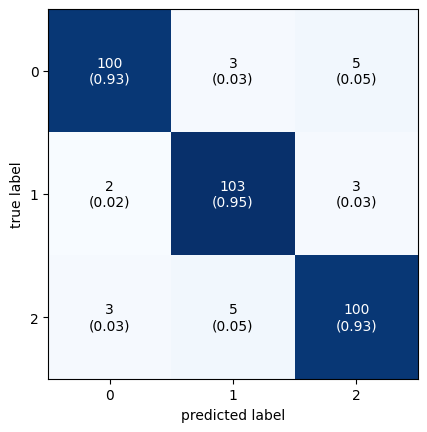

              precision    recall  f1-score   support

           1       0.95      0.93      0.94       108
           2       0.93      0.95      0.94       108
           3       0.93      0.93      0.93       108

    accuracy                           0.94       324
   macro avg       0.94      0.94      0.94       324
weighted avg       0.94      0.94      0.94       324

VALIDATION DATA PERFORMANCE



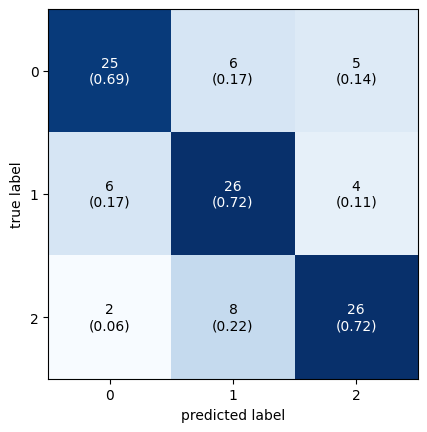

              precision    recall  f1-score   support

           1       0.76      0.69      0.72        36
           2       0.65      0.72      0.68        36
           3       0.74      0.72      0.73        36

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108

TESTING DATA PERFORMANCE



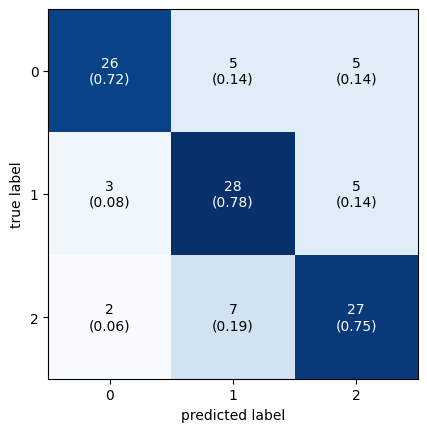

              precision    recall  f1-score   support

           1       0.84      0.72      0.78        36
           2       0.70      0.78      0.74        36
           3       0.73      0.75      0.74        36

    accuracy                           0.75       108
   macro avg       0.76      0.75      0.75       108
weighted avg       0.76      0.75      0.75       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            stacking_classifier)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=300)
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

TRAINING DATA PERFORMANCE



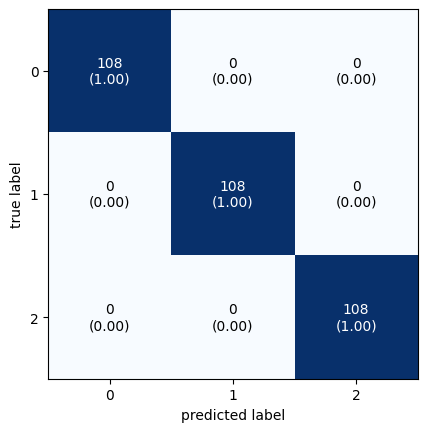

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00       108

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

VALIDATION DATA PERFORMANCE



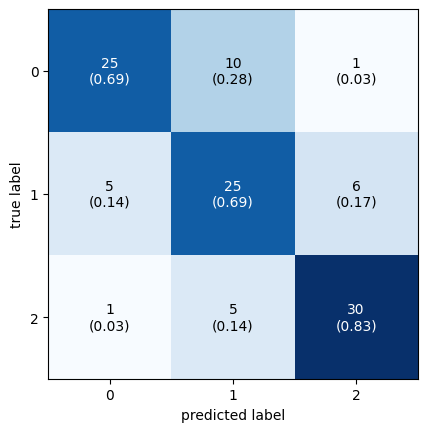

              precision    recall  f1-score   support

           1       0.81      0.69      0.75        36
           2       0.62      0.69      0.66        36
           3       0.81      0.83      0.82        36

    accuracy                           0.74       108
   macro avg       0.75      0.74      0.74       108
weighted avg       0.75      0.74      0.74       108

TESTING DATA PERFORMANCE



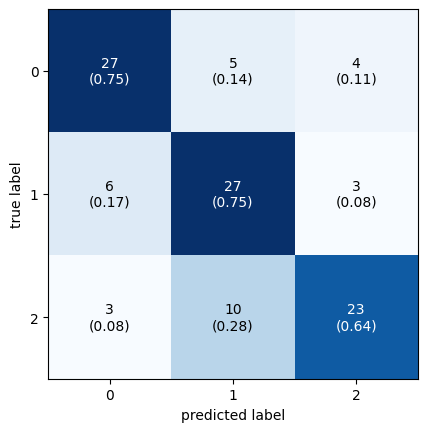

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        36
           2       0.64      0.75      0.69        36
           3       0.77      0.64      0.70        36

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108



In [ ]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            gradient_boosting_classifier)

## Discussion and Future Work


*   Individual classifier; Softmax Regression, SVM, and Random Forest, yielded an average performance, measure by the f1 score, of about 74% each.
* In an attempt to improve the score, ensemble learning is used. The hard voting classifier attained a score of 78% as it was influenced mostly by SVM and Softmax Regression that were more confident in their predictions. The soft voting classifier, on the other hand, scored around 74% as it averaged the probability estimations of the classifiers.
* Still trying to get at least 80% accuracy, stacking and gradient boosting classifiers were used to assemble a stronger models out of our classifiers. Out of this attempt, gradient boosting yielded an accuracy of about 75%, which is a slight improvement.
* The best we could do overall was 78% accuracy obtained through the hard voting classifier. This suggests that the combined decision of the majority of the individual classifiers was the most reliable.
* Towards improving the accuracy, future work would touch upon understanding the dataset even better and treating all outliers, performing feature selection, and delving even deeper with ensemble learning.

